### Setting up the dependencies

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
csv_file_path = 'your_file.csv'
try:
    df = pd.read_csv(csv_file_path)
    print("CSV file loaded successfully!")
    print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The file 'your_file.csv' was not found.


In [3]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Instantiates the device to be used as GPU/CPU based on availability
device_gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
from IPython.display import clear_output

## Dataset

### Pre-processing

In [11]:
languages = []
data = []
X = []
y = []

with open('/content/name2lang.txt', 'r') as f:
    for line in f:
        line = line.strip() # Remove leading/trailing whitespace
        if line: # Check if the line is not empty
            line_parts = line.split(',')
            if len(line_parts) > 1: # Check if there's a comma and a second part
                name = line_parts[0].strip()
                lang = line_parts[1].strip()
                if lang not in languages:
                    languages.append(lang)
                X.append(name)
                y.append(lang)
                data.append((name, lang))
            else:
                print(f"Skipping invalid line: {line}")


n_languages = len(languages)

Skipping invalid line: Connel


In [9]:
# Create the name2lang.txt file with the provided content
file_content = """Abreu, Portuguese
Albuquerque, Portuguese
Almeida, Portuguese
Alves, Portuguese
Araujo, Portuguese
Araullo, Portuguese
Barros, Portuguese
Basurto, Portuguese
Belo, Portuguese
Cabral, Portuguese
Campos, Portuguese
Cardozo, Portuguese
Castro, Portuguese
Coelho, Portuguese
Costa, Portuguese
Crespo, Portuguese
Cruz, Portuguese
D'cruz, Portuguese
D'cruze, Portuguese
Delgado, Portuguese
De santigo, Portuguese
Duarte, Portuguese
Esteves, Portuguese
Fernandes, Portuguese
Ferreira, Portuguese
Ferreiro, Portuguese
Ferro, Portuguese
Fonseca, Portuguese
Franco, Portuguese
Freitas, Portuguese
Garcia, Portuguese
Gaspar, Portuguese
Gomes, Portuguese
Gouveia, Portuguese
Guerra, Portuguese
Henriques, Portuguese
Lobo, Portuguese
Machado, Portuguese
Madeira, Portuguese
Magalhaes, Portuguese
Maria, Portuguese
Mata, Portuguese
Mateus, Portuguese
Matos, Portuguese
Medeiros, Portuguese
Melo, Portuguese
Mendes, Portuguese
Moreno, Portuguese
Nunes, Portuguese
Palmeiro, Portuguese
Paredes, Portuguese
Pereira, Portuguese
Pinheiro, Portuguese
Pinho, Portuguese
Ramires, Portuguese
Ribeiro, Portuguese
Rios, Portuguese
Rocha, Portuguese
Rodrigues, Portuguese
Romao, Portuguese
Rosario, Portuguese
Salazar, Portuguese
Santana, Portuguese
Santiago, Portuguese
Santos, Portuguese
Serafim, Portuguese
Silva, Portuguese
Silveira, Portuguese
Simoes, Portuguese
Soares, Portuguese
Souza, Portuguese
Torres, Portuguese
Vargas, Portuguese
Ventura, Portuguese
Adam, Irish
Ahearn, Irish
Aodh, Irish
Aodha, Irish
Aonghuis, Irish
Aonghus, Irish
Bhrighde, Irish
Bradach, Irish
Bradan, Irish
Braden, Irish
Brady, Irish
Bran, Irish
Brannon, Irish
Brian, Irish
Callaghan, Irish
Caomh, Irish
Carey, Irish
Casey, Irish
Cassidy, Irish
Cathain, Irish
Cathan, Irish
Cathasach, Irish
Ceallach, Irish
Ceallachan, Irish
Cearbhall, Irish
Cennetig, Irish
Ciardha, Irish
Clark, Irish
Cleirich, Irish
Cleirigh, Irish
Cnaimhin, Irish
Coghlan, Irish
Coilean, Irish
Collins, Irish
Colman, Irish
Conall, Irish
Conchobhar, Irish
Conn, Irish
Connel"""

with open('/content/name2lang.txt', 'w') as f:
    f.write(file_content)

print("name2lang.txt created successfully in /content/")

name2lang.txt created successfully in /content/


In [12]:
print(languages)

['Portuguese', 'Irish']


In [14]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


### Test-train split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
print(X_train)

['Cnaimhin', 'Fonseca', 'Palmeiro', 'Nunes', 'Coilean', 'Delgado', 'Brian', 'Pereira', 'Bradan', 'Brady', 'Cathan', 'Ciardha', 'Aodh', 'Ceallachan', 'Silva', 'Basurto', 'Mata', 'Almeida', 'Cleirigh', "D'cruze", 'Araujo', 'Albuquerque', 'Araullo', 'Simoes', 'Cruz', 'Madeira', 'Brannon', 'Torres', 'Bradach', 'Bhrighde', 'Salazar', 'Duarte', 'Costa', 'Bran', 'Gouveia', 'Cardozo', 'Coelho', 'Esteves', 'Clark', 'Freitas', 'Campos', 'Rosario', 'Cennetig', 'Matos', 'Garcia', 'Castro', 'Silveira', 'Romao', 'Caomh', 'Paredes', 'Ahearn', 'Soares', 'Conn', 'Moreno', 'Vargas', 'Ramires', 'Magalhaes', 'Aonghus', 'Ferro', 'Maria', 'Belo', 'Ferreira', 'Colman', 'Ferreiro', 'Mateus', 'Collins', "D'cruz", 'Pinheiro', 'Santiago', 'De santigo', 'Crespo', 'Melo', 'Conall', 'Cearbhall', 'Santos', 'Casey', 'Rodrigues', 'Medeiros', 'Rios', 'Barros', 'Carey', 'Machado', 'Cleirich', 'Alves', 'Mendes', 'Coghlan', 'Ceallach', 'Souza', 'Callaghan']


In [17]:
print(len(X_train), len(X_test))

89 23


### Encoding names and language

In [18]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [19]:
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters)
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        rep[index][0][pos] = 1
    return rep

In [20]:
def lang_rep(lang):
    return torch.tensor([languages.index(lang)], dtype=torch.long)

In [21]:
name_rep('Abreu')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [22]:
lang_rep('Portuguese')

tensor([0])

### Basic visualisation

In [23]:
count = {}
for l in languages:
    count[l] = 0
for d in data:
    count[d[1]] += 1

In [24]:
print(count)

{'Portuguese': 74, 'Irish': 38}


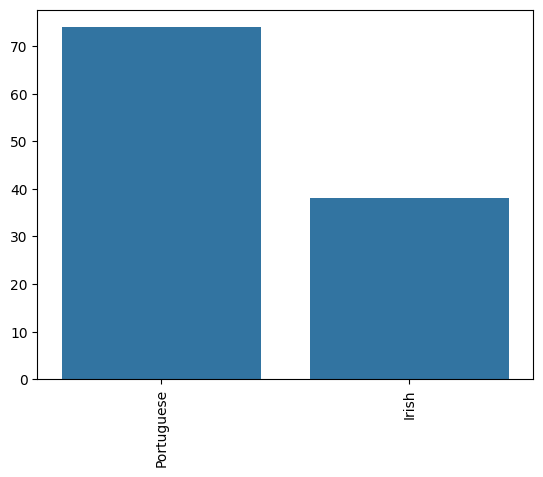

In [27]:
plt_ = sns.barplot(x=list(count.keys()), y=list(count.values()))
plt_.set_xticks(range(len(count))) # Set the ticks
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

## Basic network and testing inference

In [28]:
class RNN_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size
        self.rnn_cell = nn.RNN(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_, hidden = None, batch_size = 1):
        out, hidden = self.rnn_cell(input_, hidden)
        output = self.h2o(hidden.view(-1, self.hidden_size))
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self, batch_size = 1):
        return torch.zeros(1, batch_size, self.hidden_size)

In [29]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)

In [30]:
def infer(net, name, device = 'cpu'):
    name_ohe = name_rep(name).to(device)

    output, hidden = net(name_ohe)

    if type(hidden) is tuple: # For LSTM
        hidden = hidden[0]
    index = torch.argmax(hidden)

    return output

In [31]:
infer(net, 'Adam')

tensor([[-0.7407, -0.6478]], grad_fn=<LogSoftmaxBackward0>)

## Evaluate model

In [32]:
def dataloader(npoints, X_, y_):
    to_ret = []
    for i in range(npoints):
        index_ = np.random.randint(len(X_))
        name, lang = X_[index_], y_[index_]
        to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    return to_ret

In [33]:
dataloader(2, X_train, y_train)

[('Cathan',
  'Irish',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [34]:
def eval(net, n_points, topk, X_, y_, device = 'cpu'):
    net = net.eval().to(device)
    data_ = dataloader(n_points, X_, y_)
    correct = 0

    for name, language, name_ohe, lang_rep in data_:

        output = infer(net, name, device)
        val, indices = output.topk(topk)
        indices = indices.to('cpu')

        if lang_rep in indices:
            correct += 1

    accuracy = correct/n_points
    return accuracy

In [35]:
eval(net, 1000, 1, X_test, y_test)

0.515

# Batching

In [36]:
def batched_name_rep(names, max_word_size):
    rep = torch.zeros(max_word_size, len(names), n_letters)
    for name_index, name in enumerate(names):
        for letter_index, letter in enumerate(name):
            pos = all_letters.find(letter)
            rep[letter_index][name_index][pos] = 1
    return rep

In [37]:
def print_char(name_reps):
    name_reps = name_reps.view((-1, name_reps.size()[-1]))
    for t in name_reps:
        if torch.sum(t) == 0:
            print('<pad>')
        else:
            index = t.argmax()
            print(all_letters[index])

In [38]:
out_ = batched_name_rep(['Shyam', 'Ram'], 5)
print(out_)
print(out_.shape)
print_char(out_)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0

In [39]:
def batched_lang_rep(langs):
    rep = torch.zeros([len(langs)], dtype=torch.long)
    for index, lang in enumerate(langs):
        rep[index] = languages.index(lang)
    return rep

In [40]:
def batched_dataloader(npoints, X_, y_, verbose=False, device = 'cpu'):
    names = []
    langs = []
    X_lengths = []

    for i in range(npoints):
        index_ = np.random.randint(len(X_))
        name, lang = X_[index_], y_[index_]
        X_lengths.append(len(name))
        names.append(name)
        langs.append(lang)
    max_length = max(X_lengths)

    names_rep = batched_name_rep(names, max_length).to(device)
    langs_rep = batched_lang_rep(langs).to(device)

    padded_names_rep = torch.nn.utils.rnn.pack_padded_sequence(names_rep, X_lengths, enforce_sorted = False)

    if verbose:
        print(names_rep.shape, padded_names_rep.data.shape)
        print('--')

    if verbose:
        print(names)
        print_char(names_rep)
        print('--')

    if verbose:
        print_char(padded_names_rep.data)
        print('Lang Rep', langs_rep.data)
        print('Batch sizes', padded_names_rep.batch_sizes)


    return padded_names_rep.to(device), langs_rep

In [42]:
p, l = batched_dataloader(3, X_train, y_train, True)

torch.Size([9, 3, 57]) torch.Size([22, 57])
--
['Moreno', 'Rodrigues', 'Rosario']
M
R
R
o
o
o
r
d
s
e
r
a
n
i
r
o
g
i
<pad>
u
o
<pad>
e
<pad>
<pad>
s
<pad>
--
R
R
M
o
o
o
d
s
r
r
a
e
i
r
n
g
i
o
u
o
e
s
Lang Rep tensor([0, 0, 0])
Batch sizes tensor([3, 3, 3, 3, 3, 3, 2, 1, 1])


## Training

### Basic setup

In [43]:
def train(net, opt, criterion, n_points):

    opt.zero_grad()
    total_loss = 0

    data_ = dataloader(n_points, X_train, y_train)

    total_loss = 0

    for name, language, name_ohe, lang_rep in data_:

        hidden = net.init_hidden()

        for i in range(name_ohe.size()[0]):
            output, hidden = net(name_ohe[i:i+1], hidden)

        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True)

        total_loss += loss

    opt.step()
    return total_loss/n_points

In [44]:
def train_batch(net, opt, criterion, n_points, device = 'cpu'):

    net.train().to(device)
    opt.zero_grad()

    batch_input, batch_groundtruth = batched_dataloader(n_points, X_train, y_train, False, device)

    output, hidden = net(batch_input)

    loss = criterion(output, batch_groundtruth)

    loss.backward()
    opt.step()
    return loss

In [45]:
net = RNN_net(n_letters, n_hidden, n_languages)
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [46]:
%%time
train(net, opt, criterion, 256)

CPU times: user 651 ms, sys: 9.62 ms, total: 660 ms
Wall time: 671 ms


tensor(0.6904, grad_fn=<DivBackward0>)

In [47]:
net = RNN_net(n_letters, n_hidden, n_languages)
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [48]:
%%time
train_batch(net, opt, criterion, 256)

CPU times: user 31.2 ms, sys: 3.75 ms, total: 34.9 ms
Wall time: 51.2 ms


tensor(0.6745, grad_fn=<NllLossBackward0>)

### Full training setup

In [49]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5, device = 'cpu'):
    net = net.to(device)
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    loss_arr = np.zeros(n_batches + 1)

    for i in range(n_batches):
        loss_arr[i+1] = (loss_arr[i]*i + train_batch(net, opt, criterion, batch_size, device))/(i + 1)

        if i%display_freq == display_freq-1:
            clear_output(wait=True)

            print('Iteration', i, 'Loss', loss_arr[i])
            # print('Top-1:', eval(net, len(X_test), 1, X_test, y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test))
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')

    print('Top-1:', eval(net, len(X_test), 1, X_test, y_test, device), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test, device))


## RNN Cell

Iteration 4999 Loss 0.0018555237911641598


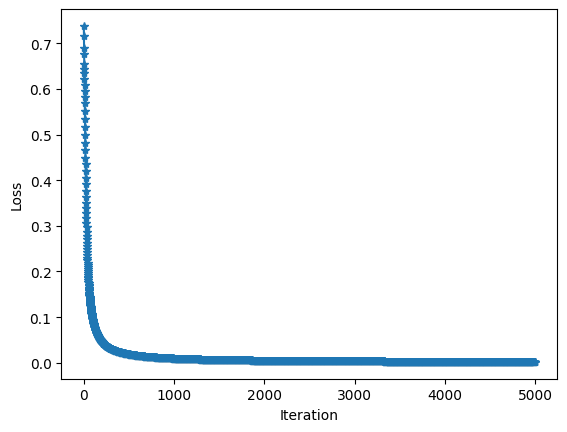




Top-1: 0.6086956521739131 Top-2: 1.0
CPU times: user 5min 13s, sys: 6.25 s, total: 5min 19s
Wall time: 5min 21s


In [50]:
%%time
net = RNN_net(n_letters, 128, n_languages)
train_setup(net, lr=0.15, n_batches=5000, batch_size = 512, display_freq=500) # CPU Training example

Iteration 4999 Loss 0.001697610248811543


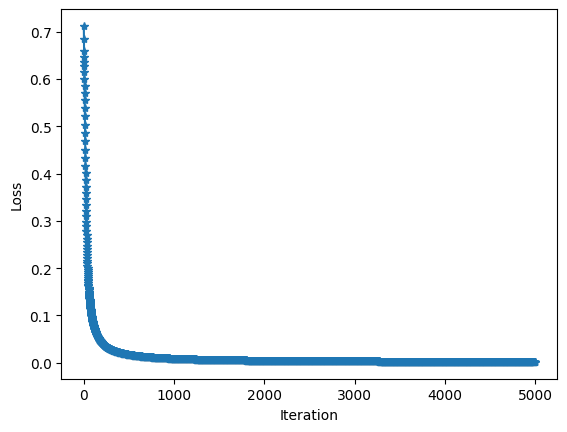




Top-1: 0.5652173913043478 Top-2: 1.0
CPU times: user 5min 15s, sys: 4.27 s, total: 5min 19s
Wall time: 5min 21s


In [51]:
%%time
net = RNN_net(n_letters, 128, n_languages)
train_setup(net, lr=0.15, n_batches=5000, batch_size = 512, display_freq=100, device = device_gpu) # GPU Training Example

## LSTM cell

In [52]:
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden = None):
        out, hidden = self.lstm_cell(input, hidden)
        output = self.h2o(hidden[0].view(-1, self.hidden_size))
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self, batch_size = 1):
        return (torch.zeros(1, batch_size, self.hidden_size), torch.zeros(1, batch_size, self.hidden_size))

Iteration 3999 Loss 0.007150173187255859


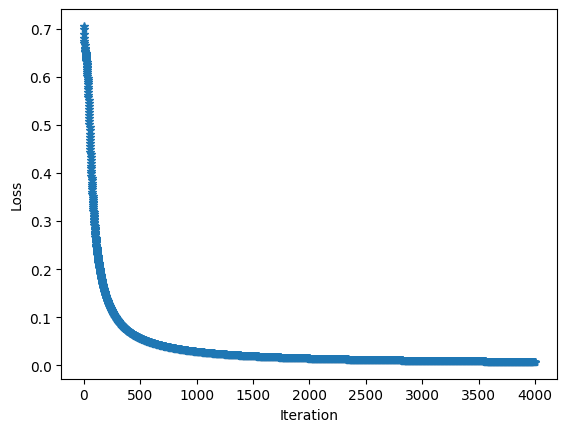

KeyboardInterrupt: 

In [53]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.15, n_batches=8000, batch_size = 512, display_freq=1000, device = device_gpu)

## GRU Cell

In [ ]:
class GRU_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        self.hidden_size = hidden_size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden = None):
        out, hidden = self.gru_cell(input, hidden)
        output = self.h2o(hidden.view(-1, self.hidden_size))
        output = self.softmax(output)
        return output, hidden

Iteration 7999 Loss 0.2180105596780777


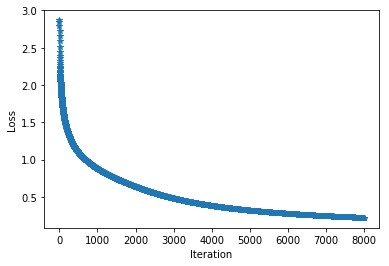




Top-1: 0.7900249376558603 Top-2: 0.8825436408977556


In [ ]:
n_hidden = 128
net = GRU_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.15, n_batches=8000, batch_size = 512, display_freq=1000, device = device_gpu)